In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Avaliação do COCO dataset com o síntetico

In [2]:
import os
import sys
import random
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("/opt/Mask_RCNN")
# Import Mask RCNN
sys.path.append(ROOT_DIR)
#sys.path.append("/workspace/car_poses")

In [3]:
# To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:

# Directory to save logs and trained model
MODEL_DIR = "/workspace/teeth_net/logs_30_05/teeth20180530T1318/"#os.path.join(ROOT_DIR, "")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(MODEL_DIR, "mask_rcnn_teeth_0030.h5")
# Download COCO trained weights from Releases if needed
#if not os.path.exists(COCO_MODEL_PATH):
#    utils.download_trained_weights(COCO_MODEL_PATH)
    
def get_ax(rows=1, cols=1, size=16):
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [5]:
from mrcnn.config import Config

class InferenceConfig(Config):
    NAME = "teeth"
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 1 + 1 # BG has 80 classes
    IMAGE_SHAPE = [1991, 1127, 3]
    

inference_config = InferenceConfig()
inference_config.IMAGE_SHAPE = [1024, 1024, 3]
inference_config.IMAGE_MAX_DIM = 1024
inference_config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024, 1024, 3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_class_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'rpn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'rpn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]

In [6]:
model = modellib.MaskRCNN(mode="inference", config=inference_config,
                          model_dir=ROOT_DIR)
# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = COCO_MODEL_PATH#os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")#COCO_MODEL_PATH#model.find_last()[1]

# Load trained weights (fill in path to trained weights here)
assert model_path != "", "Provide path to trained weights"

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /workspace/teeth_net/logs_30_05/teeth20180530T1318/mask_rcnn_teeth_0030.h5


In [27]:
%load_ext autoreload
%autoreload 2
sys.path.append("/opt/Mask_RCNN/samples/coco/")
from coco import CocoDataset
#DATASET_COCO_TEST_PATH = '/workspace/teeth_net/TEETH_DATASET'
DATASET_COCO_TEST_PATH = '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/worst/'
#DATASET_COCO_TEST_PATH = '/workspace/datasets/carposes_251p_coco_BG/'

# Test dataset
dataset_val = CocoDataset()
coco = dataset_val.load_coco(DATASET_COCO_TEST_PATH, 
                             "test", 
                             year=2018, 
                             return_coco=True, 
                             auto_download=False)
dataset_val.prepare()
print(dataset_val.image_ids)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
[0]


In [28]:
count = 0

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max: 1024.00000  int64
gt_class_id              shape: (1,)                  min:   -1.00000  max:   -1.00000  int32
gt_bbox                  shape: (1, 4)                min:  296.00000  max:  740.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  bool
image_id:  0
path:  /workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/worst//test2018/cate5-00010.jpg


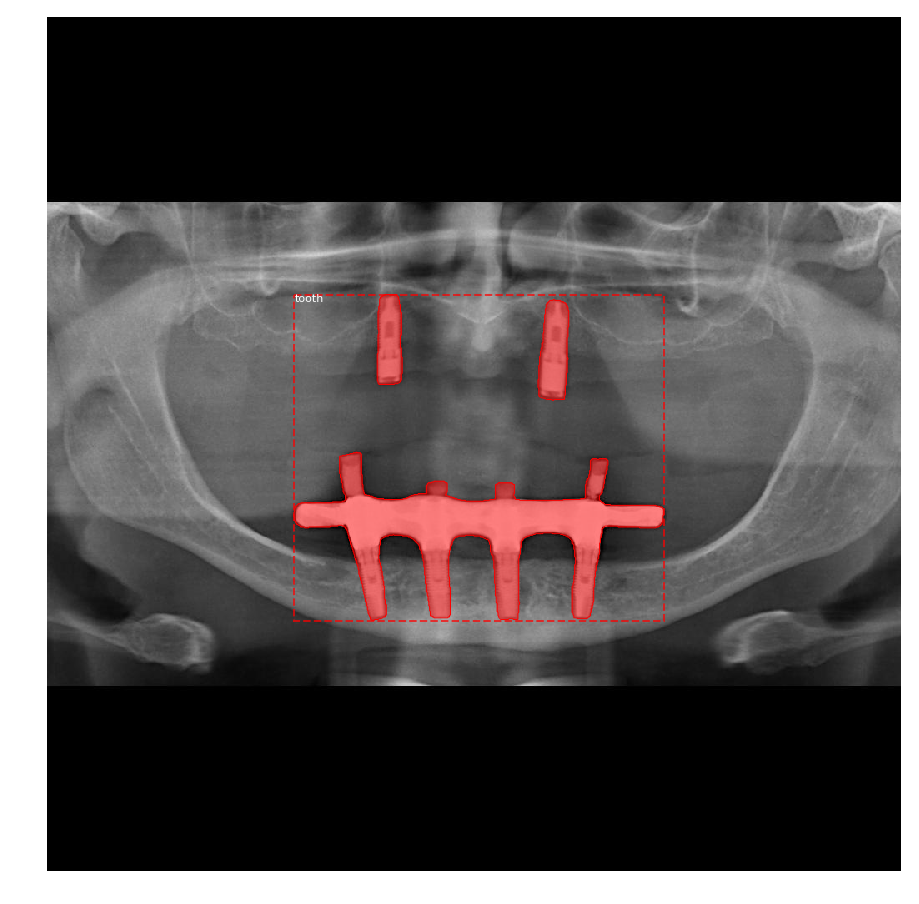

In [29]:
# Test on a random image
image_id = dataset_val.image_ids[count]#random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print('image_id: ',image_id)
print('path: ', dataset_val.image_info[image_id]['path'])

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_val.class_names, figsize=(16, 16))
count += 1


array([   0,    1,    2, ..., 1221, 1222, 1223])

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/worst/output/cate7-00022.png is a low contrast image
  warn('%s is a low contrast image' % fname)


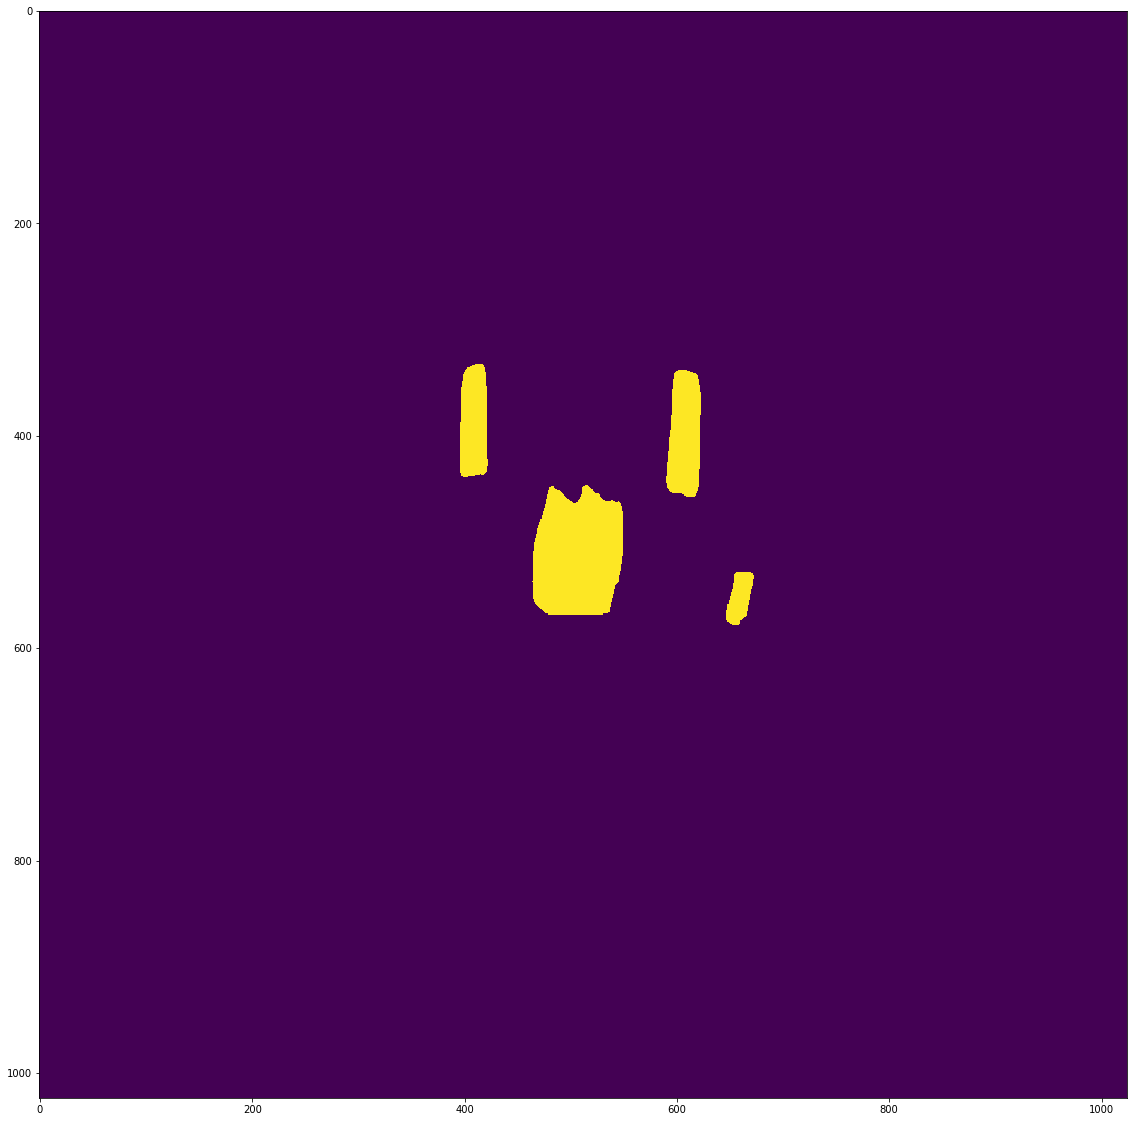

In [30]:
results = model.detect([original_image], verbose=1)

r = results[0]
mask = np.full((r['masks'].shape[0], r['masks'].shape[1], 1), False)

for m in range(r['masks'].shape[2]):
    mask[:,:, 0] = np.logical_or(mask[:,:, 0], r['masks'][:,:,m])

plt.figure(figsize=(20,20))
#visualize.display_instances(original_image, r['rois'][0:1,:], mask, r['class_ids'][0:1], 
#                            dataset_val.class_names, r['scores'][0:1], ax=get_ax(), figsize=(16, 16))

plt.imshow(mask[:,:, 0])
from skimage.io import imsave

a = np.zeros(mask[:,:, 0].shape, dtype=np.int)
a[mask[:, :, 0]] = 255
#a = mask[:, :, 0].type(np.int) * 255
imsave(fname="/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/worst/output/cate7-00022.png", arr=a) 
#visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
#                            dataset_val.class_names, r['scores'], ax=get_ax(), figsize=(16, 16))

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
loading annotations into memory...

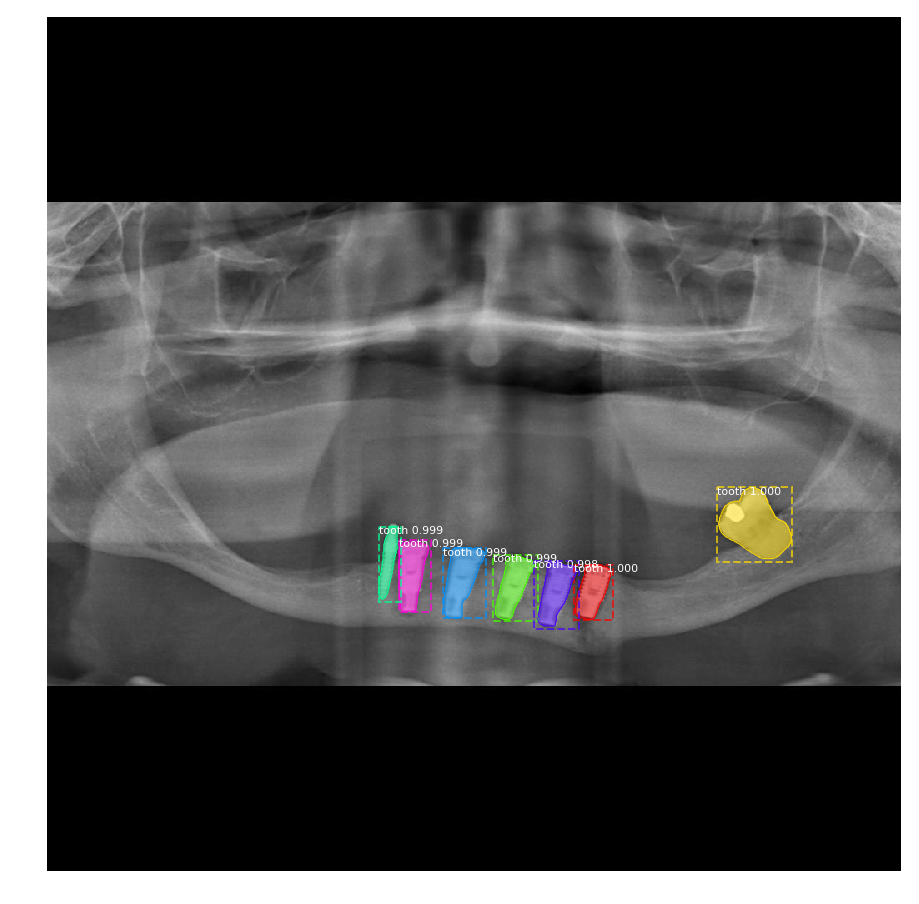

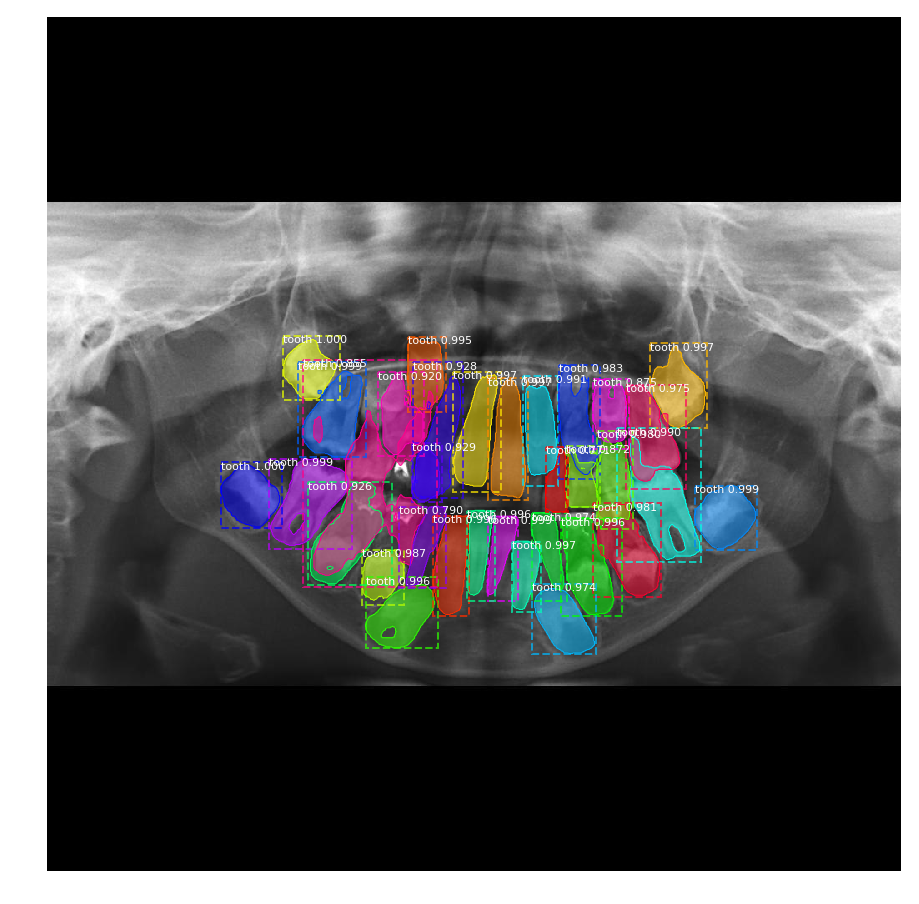

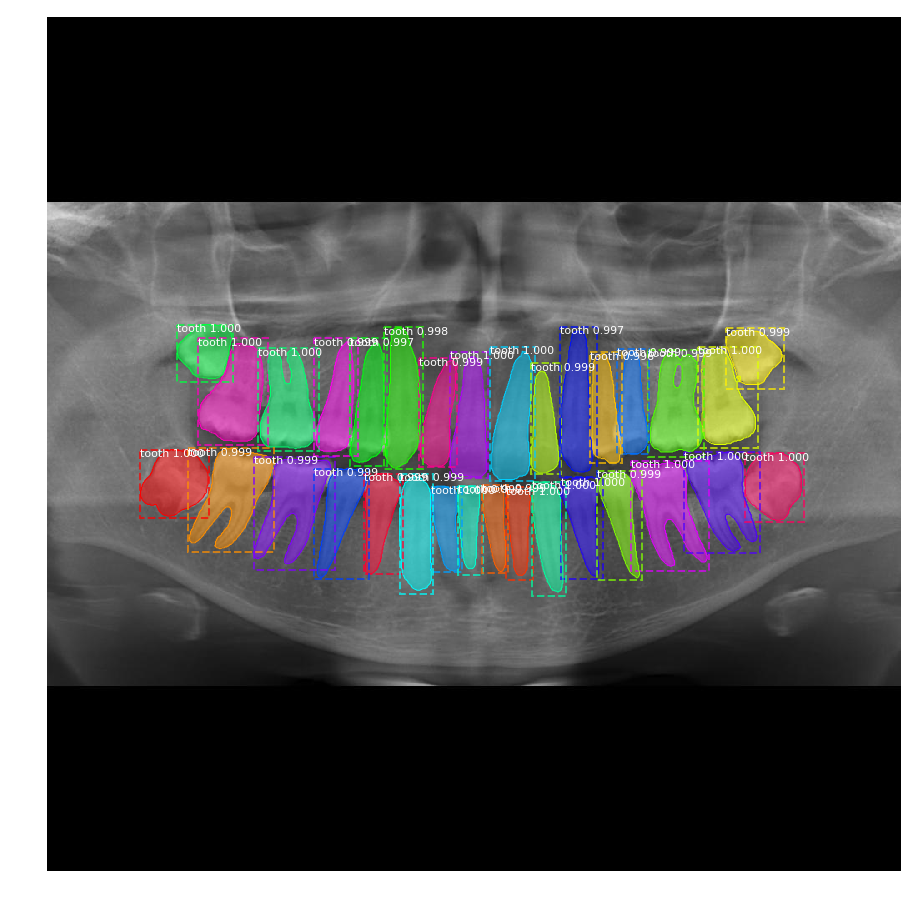

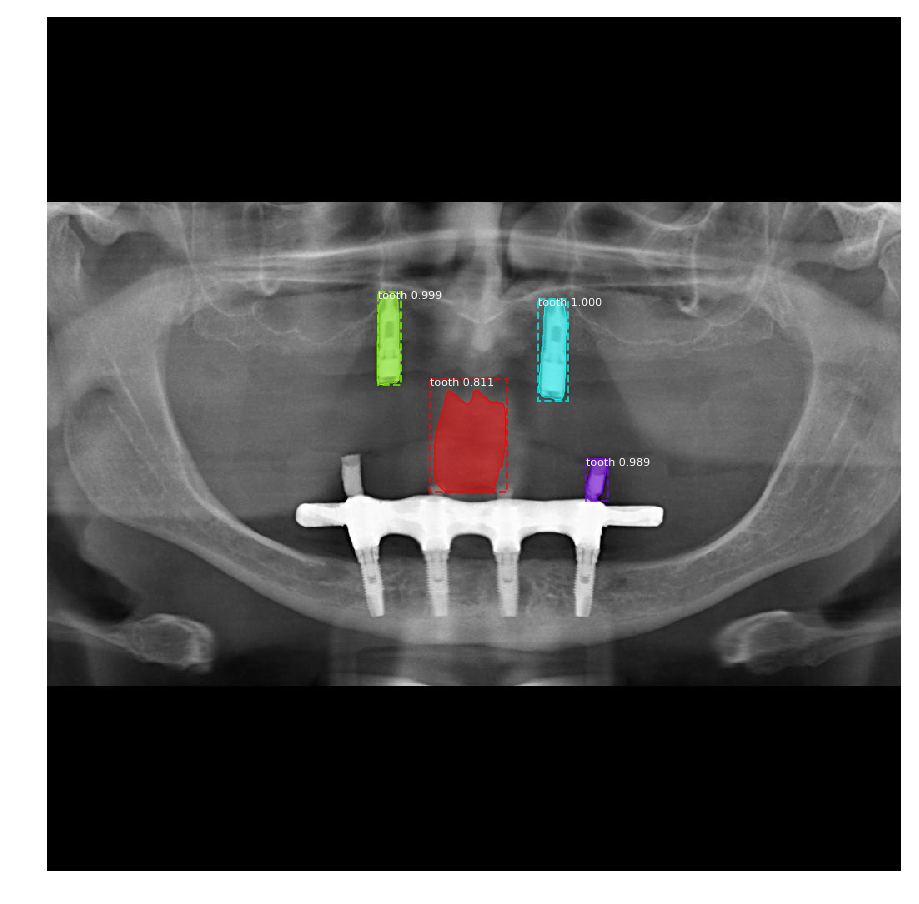

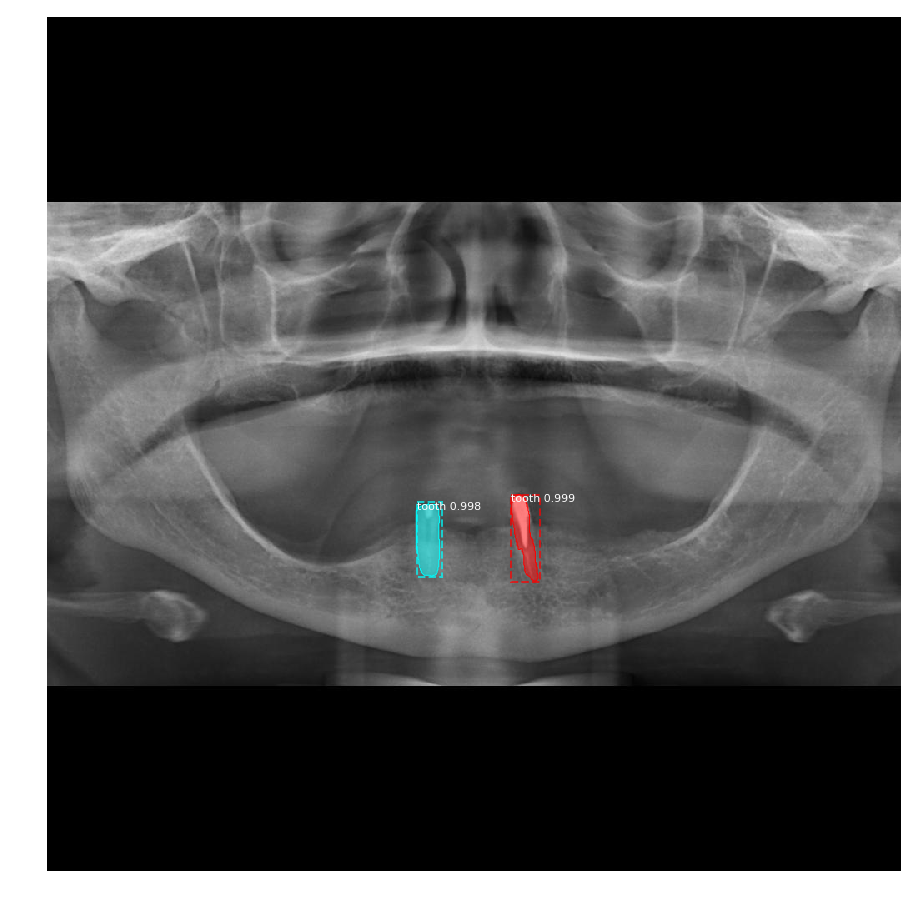

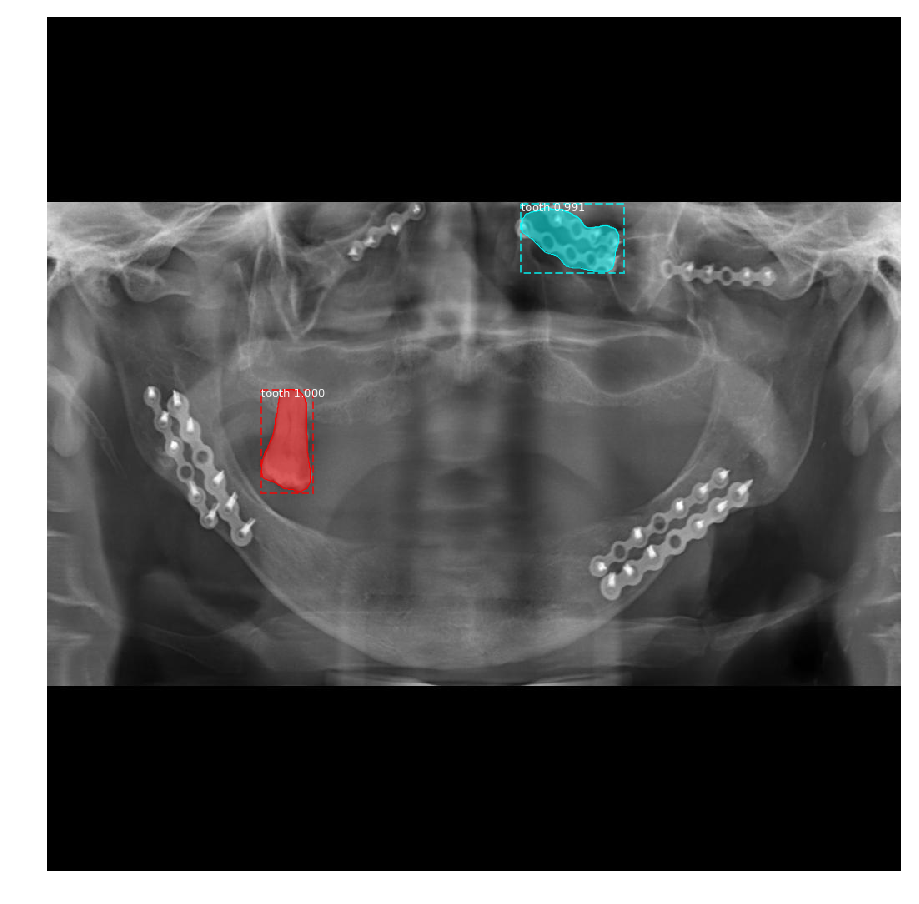

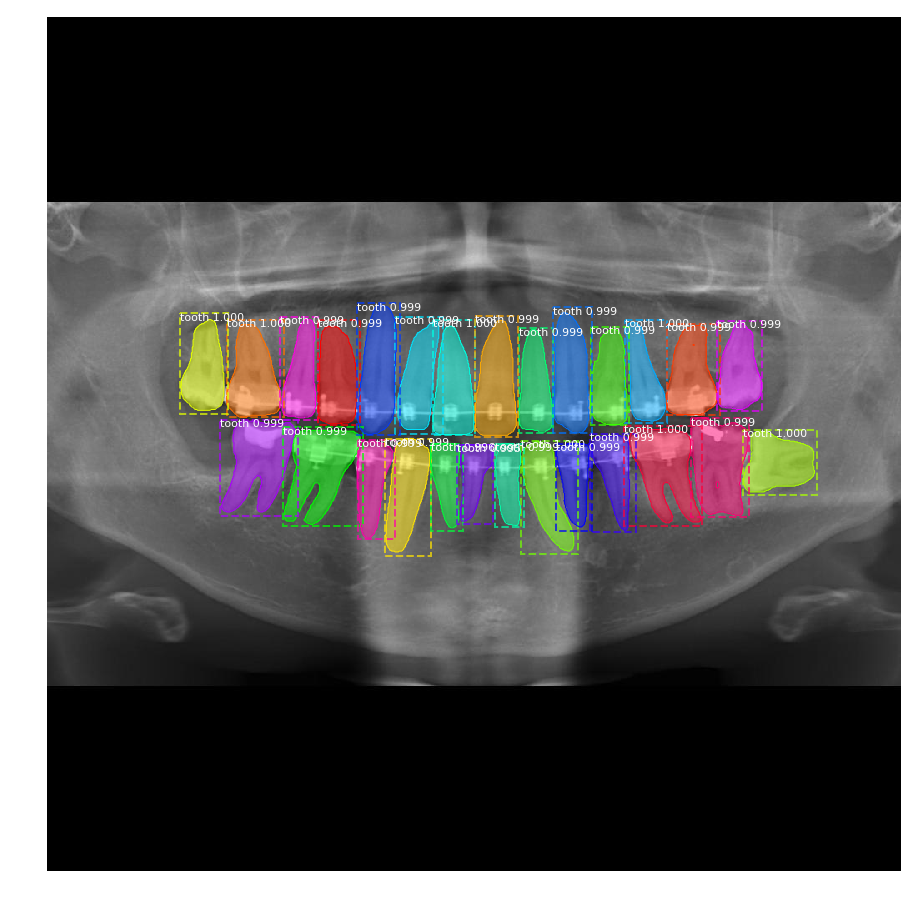

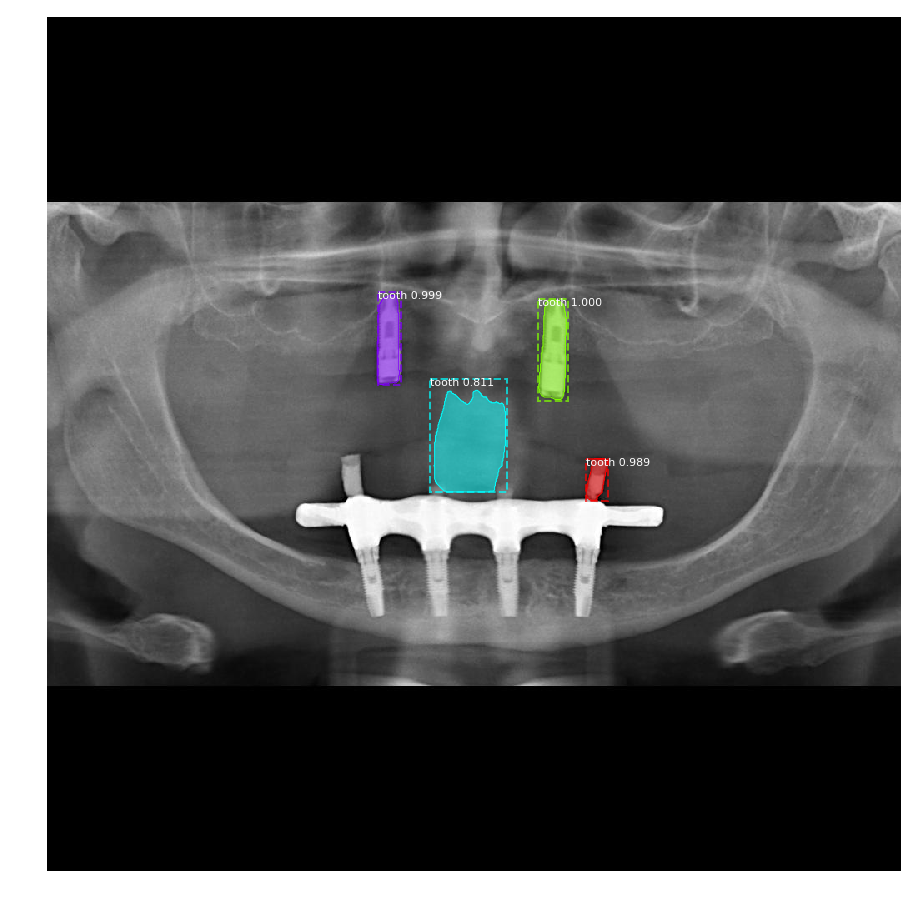

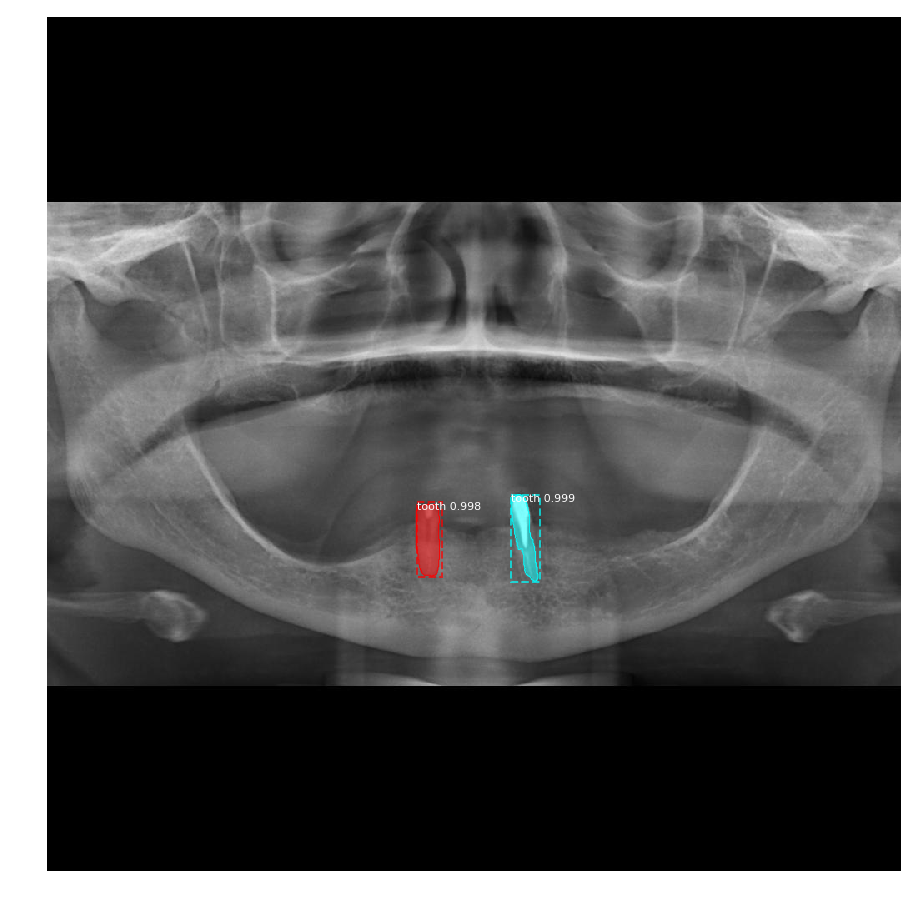

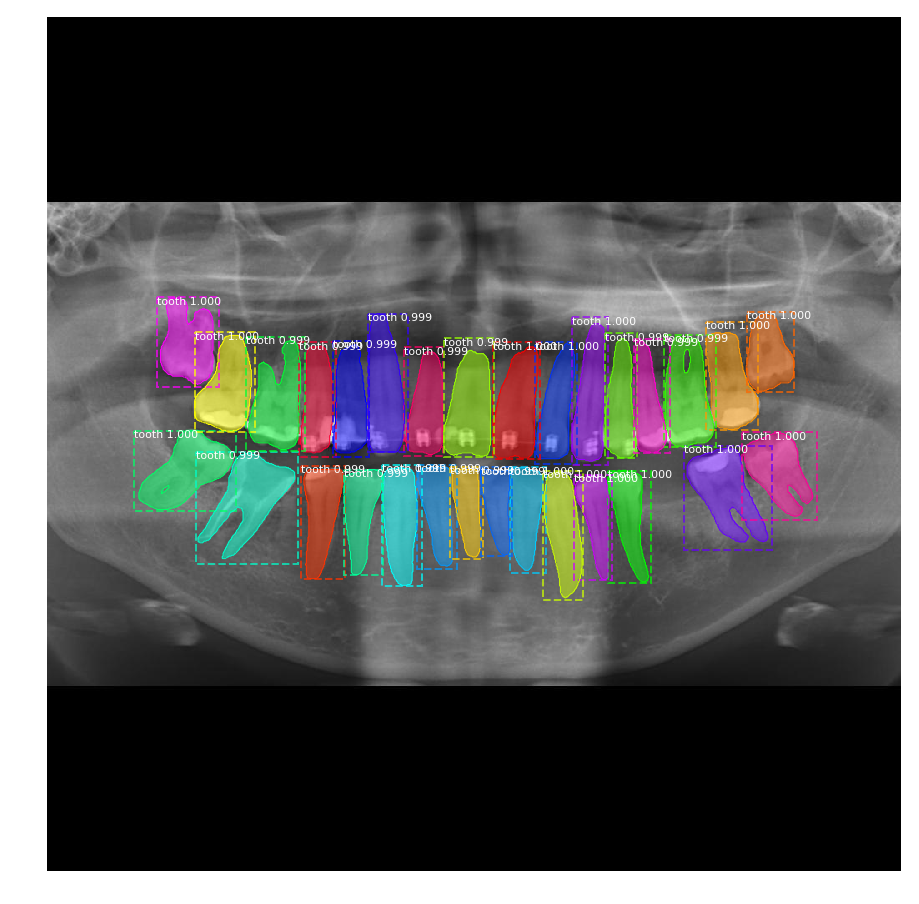

In [13]:
PATHS = ['/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/accuracy_score/best',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/accuracy_score/worst',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/f1_score/best',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/f1_score/worst',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/precision_score/best',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/precision_score/worst',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/best',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/recall_score/worst',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/specificity_score/best',
         '/workspace/teeth_net/temp_teeth_daquelaveznaofoimasagoravai/specificity_score/worst'
        ]

#accuracy_score
#f1_score
#precision_score
#recall_score
#specificity_score
for path in PATHS:
    DATASET_COCO_TEST_PATH = path
    # Test dataset
    dataset_val = CocoDataset()
    coco = dataset_val.load_coco(DATASET_COCO_TEST_PATH, 
                                 "test", 
                                 year=2018, 
                                 return_coco=True, 
                                 auto_download=False)
    dataset_val.prepare()
    
    # Test on a random image
    image_id = dataset_val.image_ids[0]#random.choice(dataset_val.image_ids)
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)
    
    results = model.detect([original_image], verbose=1)

    r = results[0]
    
    
    visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax(), figsize=(20, 20))
    
    plt.savefig(os.path.join(path, 'mask_result.png'), dpi=300)

In [26]:
import os
from os.path import join
from skimage.io import imsave

path_save = "/workspace/teeth_net/result_gt"
for i in range(len(dataset_val.image_ids)):

    image_id = dataset_val.image_ids[i]#random.choice(dataset_val.image_ids)
    image_dataset_id = os.path.split(dataset_val.image_info[image_id]['path'])[1].split('.')[0]
    
    original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

    
    """results = model.detect([original_image], verbose=1)
    
    r = results[0]
    mask = np.full((r['masks'].shape[0], r['masks'].shape[1], 1), False)

    for m in range(r['masks'].shape[2]):
        mask[:,:, 0] = np.logical_or(mask[:,:, 0], r['masks'][:,:,m])
        
    mask_save = np.full((r['masks'].shape[0], r['masks'].shape[1]), 0)
    
    mask_save[mask[:,:,0]] = 255
    
    imshow(mask_save) 

    imsave(join(path_save, image_dataset_id + ".png"), mask_save) """
    
    imsave(join(path_save, image_dataset_id + ".png"), gt_mask[:,:,0]*255) 
    
    

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00099.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00119.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00043.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00173.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00015.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00244.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00011.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00071.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00108.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00008.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00106.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00058.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00377.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00114.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00311.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00290.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00036.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00144.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00020.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00015.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00054.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00118.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00016.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00160.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00129.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate2-00054.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00119.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00131.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00054.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00059.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00004.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00104.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00025.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00421.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate4-00064.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00036.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate9-00030.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00081.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00398.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00107.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00022.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00096.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate9-00019.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00114.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00015.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate2-00051.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00088.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00099.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate4-00037.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00414.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00167.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00111.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00124.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00048.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00302.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00386.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00057.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00055.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00128.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00032.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00368.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00261.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00424.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate2-00049.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00104.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00039.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00004.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00028.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate9-00043.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00336.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00080.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00111.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00078.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00345.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00104.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00095.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00095.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00301.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00196.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00015.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00281.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate4-00033.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00050.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00384.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00407.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00448.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00062.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00080.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00058.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00420.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00295.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00232.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00038.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00082.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00031.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00240.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00120.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00078.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00103.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00289.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate2-00082.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00199.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00036.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00171.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00027.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00138.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00181.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00169.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00403.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00441.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00115.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00330.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00136.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00001.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00126.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00002.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00444.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00018.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00179.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate7-00032.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00393.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00005.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00055.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00180.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00087.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00110.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00144.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00052.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00164.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00016.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00074.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate5-00001.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00058.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00401.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate8-00051.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimag

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00073.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate10-00037.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00064.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate1-00012.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:132: UserWarning: /workspace/teeth_net/result_gt/cate6-00033.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.5/dist-packages/skima

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=1.77s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.518
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.822
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.637
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.576
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.566
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [30]:
sys.path.append("/opt/Mask_RCNN/samples/coco")
from coco import evaluate_coco

evaluate_coco(model, dataset_val, coco, "segm")

evaluate_coco(model, dataset_val, coco, "bbox")

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.65s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.512
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.822
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.614
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.556
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.601
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.020
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.571
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=10

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from coco import evaluate_coco_by_class

In [ ]:
eval_coco = evaluate_coco_by_class(model, dataset_val, coco, "bbox")

In [ ]:
eval_coco.summarize()

In [ ]:
dataset_val.source_class_ids

In [ ]:
# Pick COCO images from the dataset
import copy 
dataset =  copy.deepcopy(dataset_val)
image_ids =  dataset.image_ids
category_id = 3

limit = 100
# Limit to a subset
if limit:
    image_ids = image_ids[:limit]

for id in image_ids:
    annotations = dataset.image_info[id]["annotations"]
    annotations_new = [a for a in annotations if a["category_id"] == category_id ]
    if len(annotations_new) == 0:
        dataset.image_info[id]["valid"] = False
    else:
        dataset.image_info[id]["annotations"] = annotations_new
        dataset.image_info[id]["valid"] = True
    
    #print(annotations_new)

print(len([ id for id in image_ids if dataset.image_info[id]["valid"]]))
# Get corresponding image IDs by class.
#image_info_new = [dataset.image_info[id]["annotations"] for id in image_ids]


# Get corresponding COCO image IDs.
#coco_image_ids = [dataset.image_info[id]["id"] for id in image_ids]

In [ ]:
dir(dataset)

In [ ]:
    t_prediction = 0
    t_start = time.time()

    results = []
    for i, image_id in enumerate(image_ids):
        # Load image
        image = dataset.load_image(image_id)

        # Run detection
        t = time.time()
        r = model.detect([image], verbose=0)[0]
        t_prediction += (time.time() - t)

        # Convert results to COCO format
        # Cast masks to uint8 because COCO tools errors out on bool
        image_results = build_coco_results(dataset, coco_image_ids[i:i + 1],
                                           r["rois"], r["class_ids"],
                                           r["scores"],
                                           r["masks"].astype(np.uint8))
        results.extend(image_results)

    # Load results. This modifies results with additional attributes.
    coco_results = coco.loadRes(results)

    # Evaluate
    cocoEval = COCOeval(coco, coco_results, eval_type)
    cocoEval.params.imgIds = coco_image_ids
    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize()

    print("Prediction time: {}. Average {}/image".format(
        t_prediction, t_prediction / len(image_ids)))
    print("Total time: ", time.time() - t_start)
    return cocoEval

In [ ]:
classe_r = r["class_ids"]
r_new = {}
filter_r = classe_r == 3
r_new["class_ids"] = r["class_ids"][filter_r]
r_new["masks"] = r["masks"][:, :, filter_r]
r_new["rois"] = r["rois"][filter_r]
r_new["scores"] = r["scores"][filter_r]


In [ ]:
r_new["masks"].shape